Nama  : San Antonio Limbong

NIM   : 12S19033

### Exercise 1 | Artificial Neural Network Model
#### Latihan 1.1 Artificial Neural Network Model using Scikit-Learn Library

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

iris = datasets.load_iris()

X = iris.data
y = iris.target

Code diatas untuk melakukan import pustakan yang dibutuhkan dan memuat data.

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


Code diatas untuk membagi data kedalam 3 bagian, yaitu data untuk pelatihan (train),
data untuk validasi dan data untuk test.

In [3]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', max_iter=1000, epsilon=1e-08)

Code diatas digunakan untuk mendefinisikan model multi classification dengan kode program beris pertama dan compile model dengan kode program baris kedua.

In [4]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 1.0


Code diatas untuk melakukan fit model (Anda dapat mengikuti baris kode ke 3)

In [5]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.9333333333333333


Code diatas untuk melakukan evaluasi model

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN: 0.9333333333333333


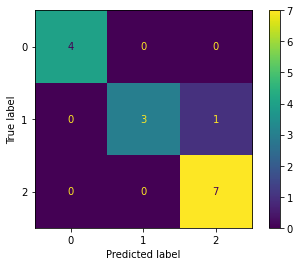

In [6]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

Code diatas untuk melihat prediksi

#### Latihan 1.2 Artificial Neural Network Model using Keras Library

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

Code diatas untuk membagi data Anda kedalam 3 bagian, yaitu: data training, data validation, data test

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [9]:
model = Sequential()
model.add(Flatten())

Code diatas untuk  membuat object sequential class dan prosess flattening.

In [10]:
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

Dense adalah fungsi untuk menambahkan layer yang fully connected.

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [12]:
model.fit(X_train,Y_train,epochs=100,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/100
23/23 [==============================] - 4s 16ms/step - loss: 1.0818 - acc: 0.3596 - val_loss: 1.0385 - val_acc: 0.2381
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9365 - acc: 0.6140 - val_loss: 0.9182 - val_acc: 0.7619
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.8460 - acc: 0.7807 - val_loss: 0.8252 - val_acc: 0.8095
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7687 - acc: 0.8333 - val_loss: 0.7353 - val_acc: 0.8095
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7000 - acc: 0.8333 - val_loss: 0.6657 - val_acc: 0.8095
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6516 - acc: 0.8421 - val_loss: 0.6090 - val_acc: 0.7619
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6050 - acc: 0.8158 - val_loss: 0.5646 - val_acc: 0.8571
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5686 - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [14]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

1/1 [==============================] - 0s 20ms/step - loss: 0.1023 - acc: 0.9333
Akurasi Testing ANN: 0.9333333373069763


### Exercise 2 | Artificial Neural Network (ANN) and Convolutional Neural Netewok (CNN) using Keras Library

In [15]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11490434/11490434 [==============================] - 7s 1us/step


Code diatas untuk load data.

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##### Menggunakan model Multilayer Neural Network 

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#model 1 menggunakan Multiplayer Neural Network

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [18]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.3932 - acc: 0.8939 - val_loss: 0.2103 - val_acc: 0.9411
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1866 - acc: 0.9467 - val_loss: 0.1618 - val_acc: 0.9541
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1435 - acc: 0.9589 - val_loss: 0.1330 - val_acc: 0.9605
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1189 - acc: 0.9653 - val_loss: 0.1234 - val_acc: 0.9623
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1014 - acc: 0.9704 - val_loss: 0.1118 - val_acc: 0.9648
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0871 - acc: 0.9751 - val_loss: 0.1075 - val_acc: 0.9654
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0767 - acc: 0.9777 - val_loss: 0.0931 - val_acc: 0.9711
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (100, 784)                0         
                                                                 
 dense_2 (Dense)             (100, 64)                 50240     
                                                                 
 dense_3 (Dense)             (100, 10)                 650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0844 - acc: 0.9745


[0.08438680320978165, 0.9745000004768372]

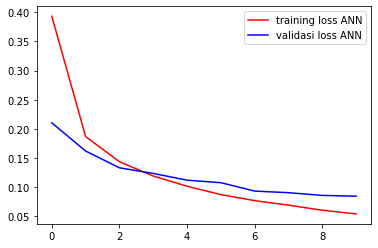

In [21]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [22]:
import numpy as np

pred = model1.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 1s 964us/step
label actual: 3
label prediction: 3


##### Menggunakan Model Convolutional Neural Network

Langkah pertama adalah mendefinisikan model Convolutional Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#model2 menggunakan Convolutional Neural Network

model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [24]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

Selanjutnya compile model dan fit model dengan mengikuti kode program dibawah ini

In [25]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 15s 24ms/step - loss: 0.2531 - acc: 0.9240 - val_loss: 0.0705 - val_acc: 0.9770
Epoch 2/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0675 - acc: 0.9794 - val_loss: 0.0487 - val_acc: 0.9855
Epoch 3/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0427 - val_acc: 0.9855
Epoch 4/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0393 - acc: 0.9875 - val_loss: 0.0409 - val_acc: 0.9860
Epoch 5/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0310 - acc: 0.9899 - val_loss: 0.0379 - val_acc: 0.9880
Epoch 6/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.0364 - val_acc: 0.9878
Epoch 7/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0295 - val_acc: 0.9903
Epoch 8/10
600/600 [==============================] - 16s 26ms

Evaluasi model

In [26]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0329 - acc: 0.9891


[0.03294181451201439, 0.9890999794006348]

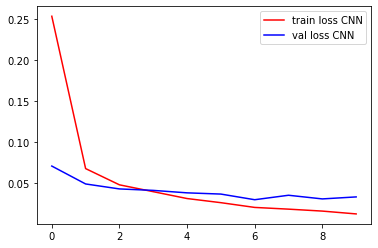

In [27]:
import matplotlib.pyplot as plt

epochs = range(10)

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r',label='train loss CNN')
plt.plot(epochs,val_loss2,'b',label='val loss CNN')
plt.legend()

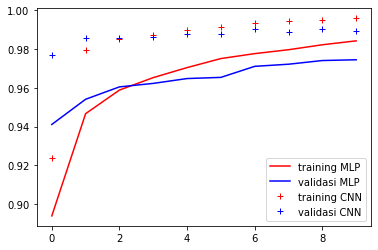

In [28]:
import matplotlib.pyplot as plt

epochs = range(10)

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs,acc1,'r',label='training MLP')
plt.plot(epochs,val_acc1,'b',label='validasi MLP')

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

plt.plot(epochs,acc2,'r+',label='training CNN')
plt.plot(epochs,val_acc2,'b+',label='validasi CNN')
plt.legend()

Output dari visualisasi ini merupakan perbandingan Loss dari model CNN dan model ANN


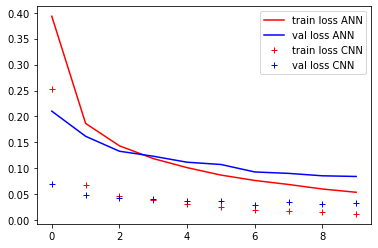

In [29]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [30]:
import numpy as np

pred = model2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 1s 4ms/step
label actual: 3
label prediction: 3


##### Menggunakan Model Convolutional Neural Network dengan Dropout

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model 3 Convolutional Neural Network dengan Dropout

model3 = Sequential()
model3.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [32]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [33]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history3 = model3.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 16s 26ms/step - loss: 0.4538 - acc: 0.8570 - val_loss: 0.0929 - val_acc: 0.9715
Epoch 2/10
600/600 [==============================] - 16s 27ms/step - loss: 0.1697 - acc: 0.9499 - val_loss: 0.0556 - val_acc: 0.9816
Epoch 3/10
600/600 [==============================] - 16s 27ms/step - loss: 0.1294 - acc: 0.9607 - val_loss: 0.0454 - val_acc: 0.9856
Epoch 4/10
600/600 [==============================] - 16s 27ms/step - loss: 0.1103 - acc: 0.9670 - val_loss: 0.0408 - val_acc: 0.9862
Epoch 5/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0948 - acc: 0.9714 - val_loss: 0.0345 - val_acc: 0.9890
Epoch 6/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0874 - acc: 0.9732 - val_loss: 0.0314 - val_acc: 0.9892
Epoch 7/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0793 - acc: 0.9757 - val_loss: 0.0313 - val_acc: 0.9883
Epoch 8/10
600/600 [==============================] - 16s 27ms

In [34]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0305 - acc: 0.9902


[0.030487487092614174, 0.9901999831199646]

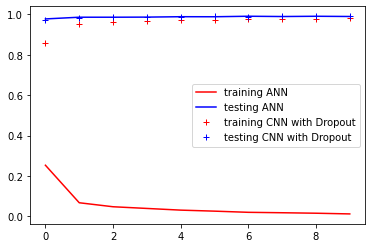

In [35]:
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

epochs = range(10)

plt.plot(epochs,loss2,'r',label='training ANN')
plt.plot(epochs,val_acc2,'b',label='testing ANN')

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

plt.plot(epochs,acc3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_acc3,'b+',label='testing CNN with Dropout')
plt.legend()

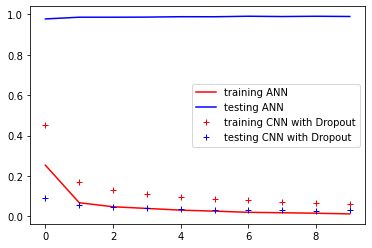

In [36]:
import matplotlib.pyplot as plt

loss2 = history2.history['loss']
val_loss2 = history2.history['val_acc']

epochs = range(10)


plt.plot(epochs,loss2,'r',label='training ANN')
plt.plot(epochs,val_loss2,'b',label='testing ANN')

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

plt.plot(epochs,loss3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_loss3,'b+',label='testing CNN with Dropout')
plt.legend()

In [37]:
pred = model3.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 1s 3ms/step
label actual: 3
label prediction: 3


### Tugas

Implementasi metode Artificial Neural Network (ANN) pada permasalahan klasifikasi.


a. mengunduh dataset Hepatitis C pada link:
https://archive.ics.uci.edu/ml/datasets/HCV+data

In [38]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('hcvdat0.csv')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


b. Pembagian dataset menajdi data train, data validasi, dan data uji.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [47]:
data['Category'] = data['Category'].astype('category')  # change the objects to category type data 
data['Sex'] = data["Sex"].astype('category')

In [48]:
data['Category'].unique()

['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
Categories (5, object): ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

In [49]:
import seaborn as sns

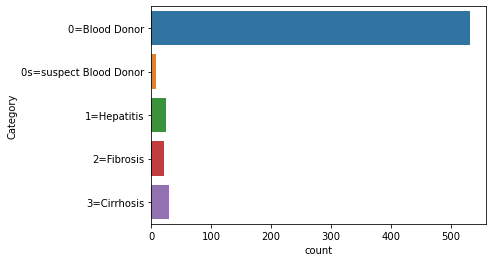

In [50]:
sns.countplot(y='Category', data = data)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Sex'>

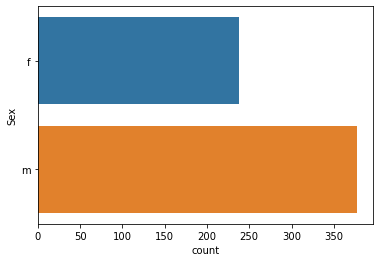

In [51]:
sns.countplot(y='Sex', data=data)

In [52]:
suspect = datadf.loc[datadf['Category'] == '0s=suspect Blood Donor'] # check the values for Os = suspect blood donor 
suspect 

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,534,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,535,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,536,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,537,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,538,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,539,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,540,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [54]:
data.dropna(how='any', inplace=True) # drop rows with null values 

## split into features and label/target

X = data.iloc[:, 2:-1].drop(columns = 'Sex').to_numpy() # features

y = data.iloc[:, -1].to_numpy() # label/target

In [55]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
data.fillna(data.mean(),inplace=True)
data.describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7576\3351323407.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace=True)


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


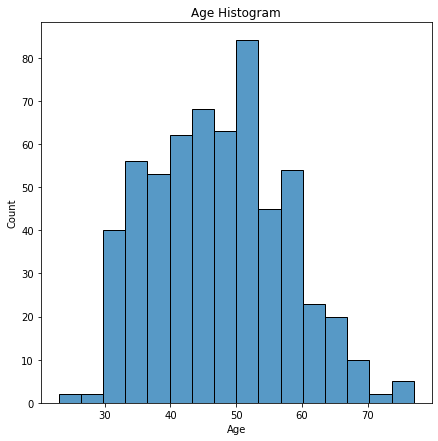

In [57]:
plt.figure(figsize=(7,7))
plt.title('Age Histogram')
sns.histplot(data['Age'])
plt.show()

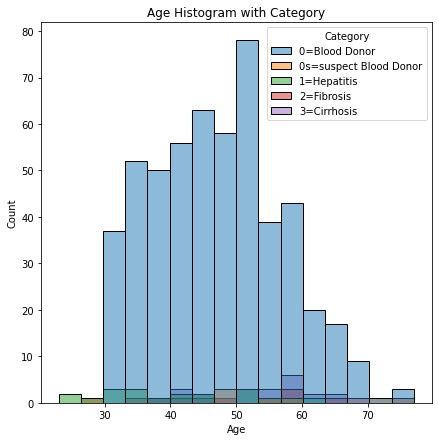

In [58]:
plt.figure(figsize=(7,7))
plt.title('Age Histogram with Category')
sns.histplot(data[['Age','Category']],x='Age',hue='Category')
plt.show()

<Figure size 504x504 with 0 Axes>

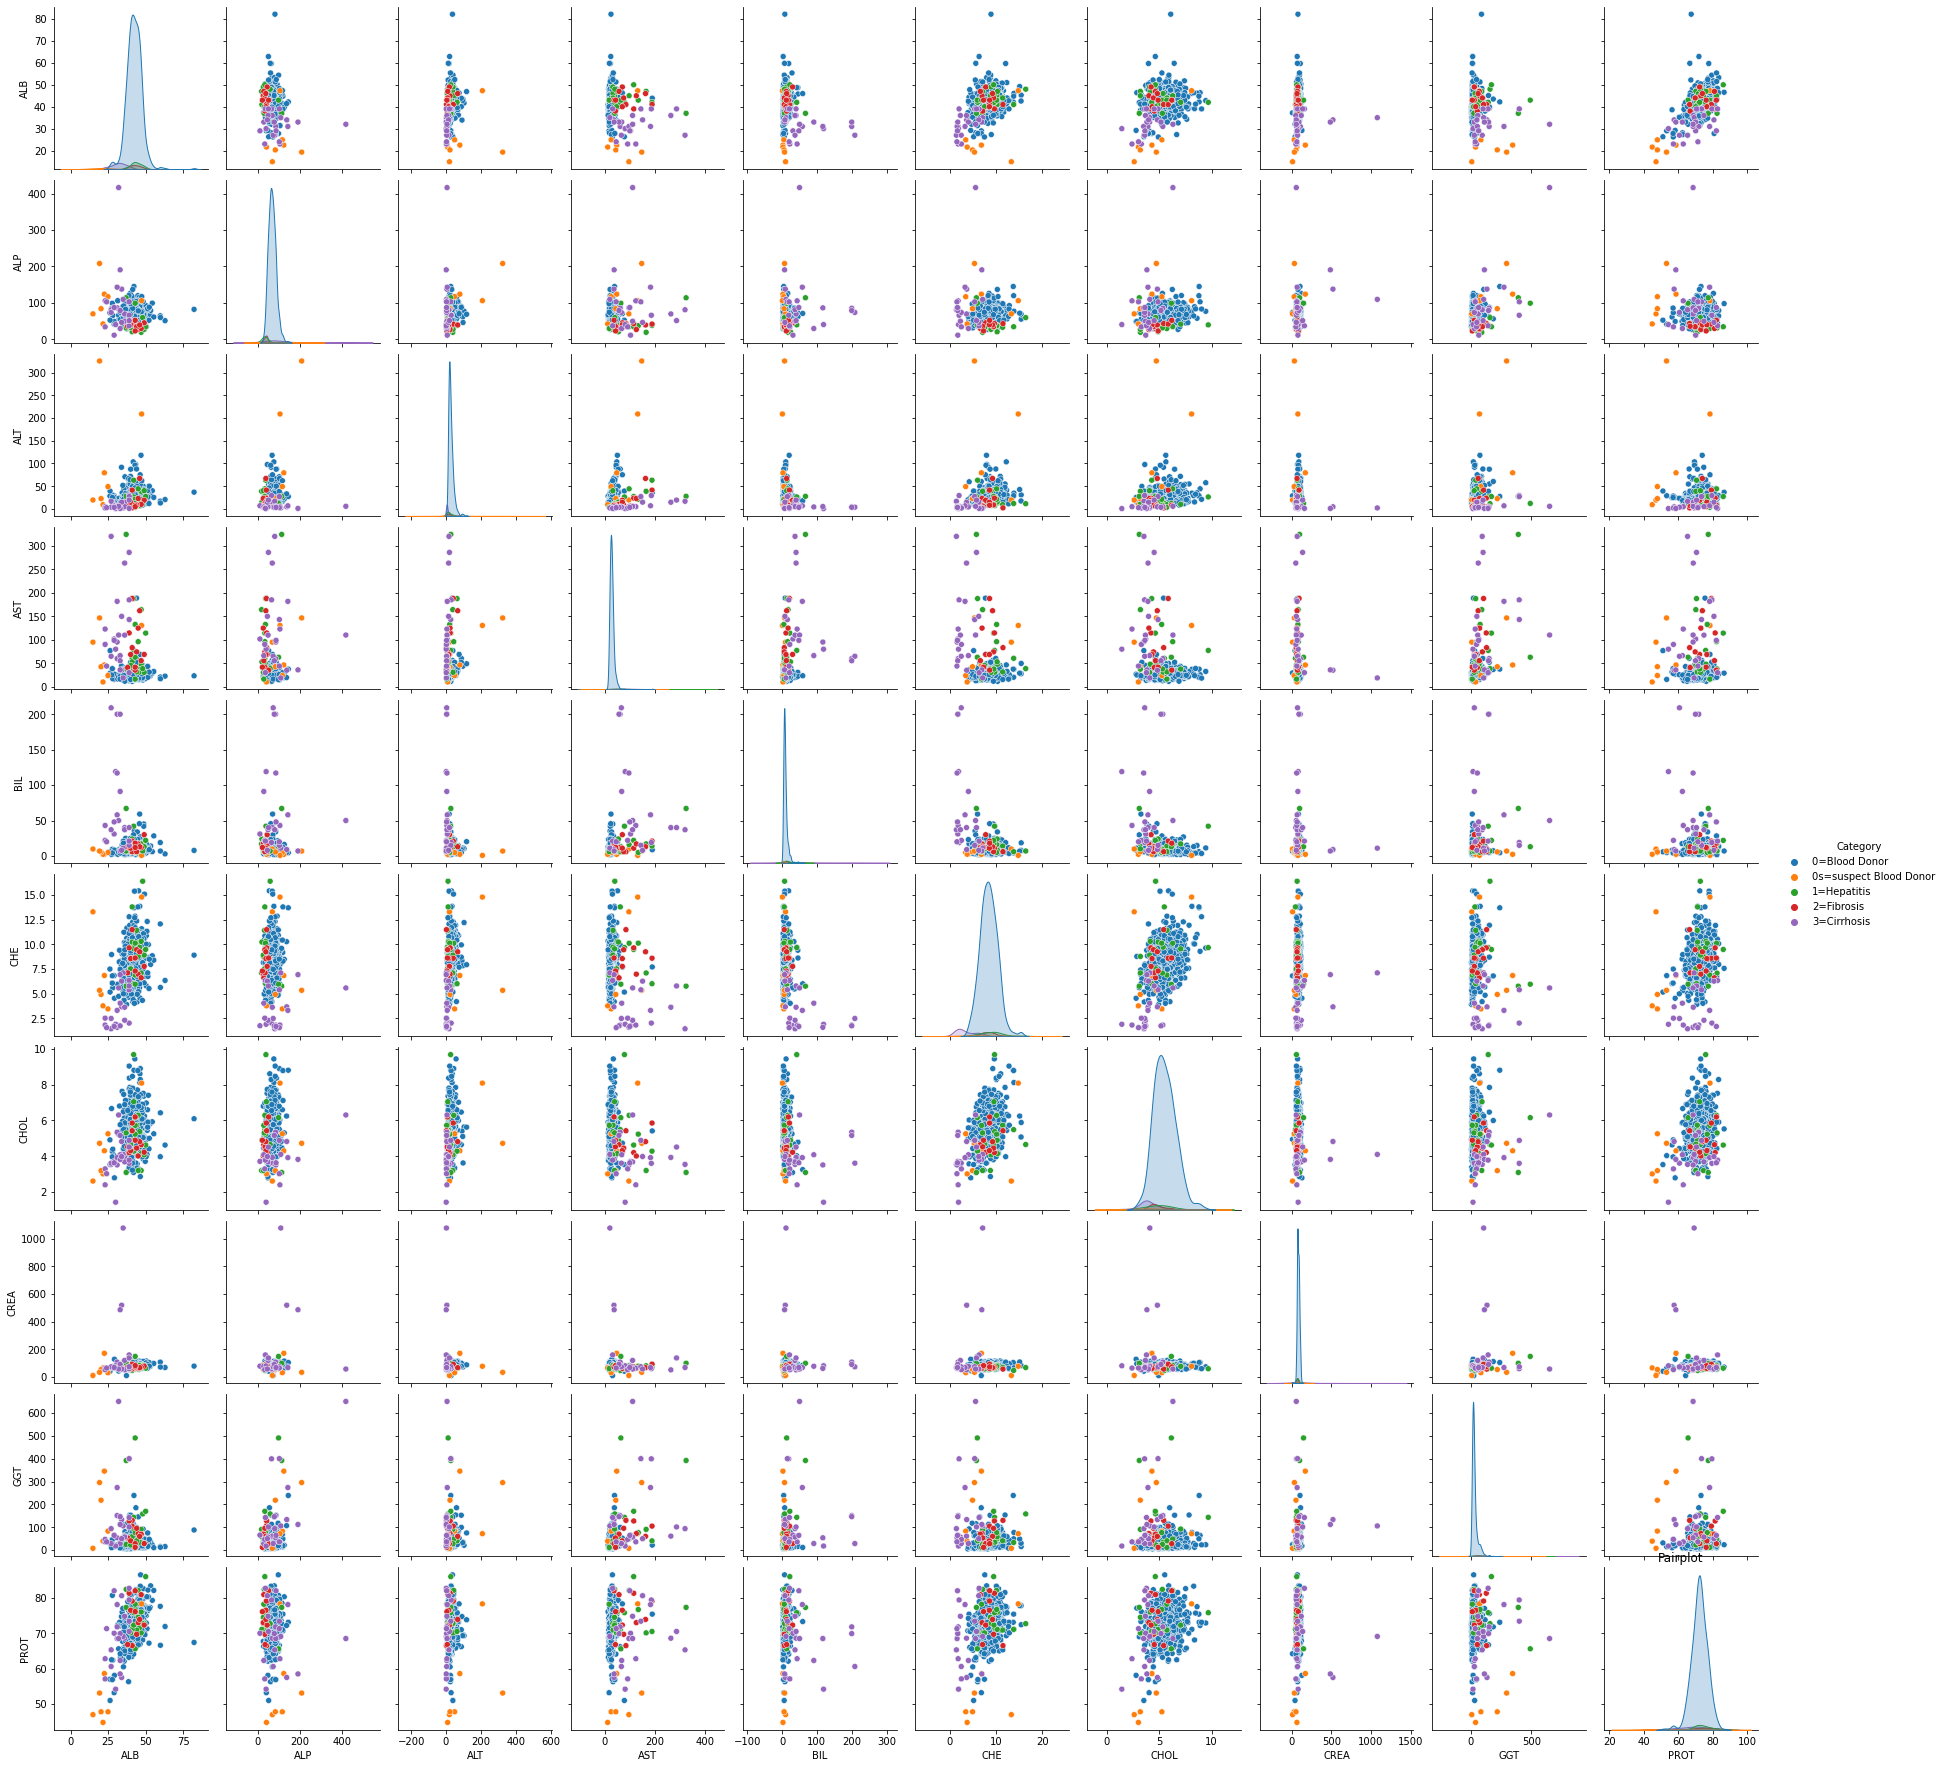

In [59]:
plt.figure(figsize=(7,7))
sns.pairplot(data=data.drop(['Age','Sex'],axis=1),hue='Category')
plt.title('Pairplot')
plt.show()

In [60]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow import keras
%matplotlib inline

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (450, 10)
X_val (80, 10)
X_test (59, 10)


c. Merancang dan membangun model ANN.

In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', max_iter=1000, epsilon=1e-08)

In [64]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [65]:
model.fit(X_train, Y_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 10)


In [66]:
model.evaluate(X_test,Y_test)

ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 10)


In [67]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

IndexError: index 71 is out of bounds for axis 1 with size 3

In [68]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [69]:
model = Sequential()
model.add(Flatten())

In [70]:
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [72]:
model.fit(X_train,Y_train,epochs=15,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/15


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (5, 1) and (5, 3) are incompatible


d. melakukan tuning parameter agar menghasilkan model yang terbaik.

In [73]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [76]:
from bayes_opt import BayesianOptimization
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------


NameError: name 'Adam' is not defined

In [77]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [78]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, input_dim=784)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode))
    model.add(Dense(10, kernel_initializer=init_mode))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [79]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters


param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

<timed exec>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


NameError: name 'init_mode' is not defined

In [80]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

NameError: name 'grid_result' is not defined

e. Menampilkan grafik loss train dan validasi dari hasil pembangunan model.


In [81]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#model 1 menggunakan Multiplayer Neural Network

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [82]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(X_train,Y_train,epochs=10,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (10, 1) and (10, 10) are incompatible


In [83]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (10, 10)                  0         
                                                                 
 dense_12 (Dense)            (10, 64)                  704       
                                                                 
 dense_13 (Dense)            (10, 10)                  650       
                                                                 
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


In [84]:
model1.evaluate(X_test,Y_test)

ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


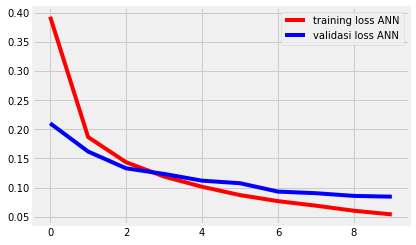

In [85]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

f. Menampilkan hasil confusion matriks dan akurasi dari data uji.

In [86]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, y_pred))

NameError: name 'y_pred' is not defined